## OUTLIER ANALYSIS

*Author - Olalekan Fagbuyi* 

### Table of Contents

**1. Introduction**

**2. Outlier Detection Methods**

**3. Python Code**

**4. Treating Outliers**

**5. Conclusion**

### 1. Introduction

In his best-selling book Outliers: The Story of Success, Malcolm Gladwell defined Outliers as “something that is situated away from or classed differently from a main or related body.” In Data Science, Outliers, also known as Anomalies, are defined as an observation or sets of statements inconsistent with the remainder of the dataset. 

The study of Outliers in Data Science is important because they highlight critical incidents such as; technical glitches, significant events, human error, or behavioural change, which helps better understand the phenomenon being studied. They also affect the learning process of Machine Learning algorithms, by skewing trends thereby reducing model performance and accuracy of predictions. 

There are three main types of Outliers:

* I: **Point Outliers** - a single data point that significantly differs from other issues in the dataset, e.g., a credit card transaction of 2000USD from a customer whose previous maximum spend was 100USD

* II: **Contextual Outliers** - Outliers in this category are commonly found in time series data. They are data point(s) significantly different from the dataset, but only within a specific context. The context might be seasonal fluctuations or broader economic trends. e.g., online sales surge on Black Friday

* III: **Collective Outliers** - a series of data points that deviates significantly from the entire dataset, e.g., neighbourhood residents all moving out simultaneously.

This project focuses on demonstrating the different methods of Outlier identification in a data set using Python code and also how to treat them in order to avoid underperforming Machine Learning models.

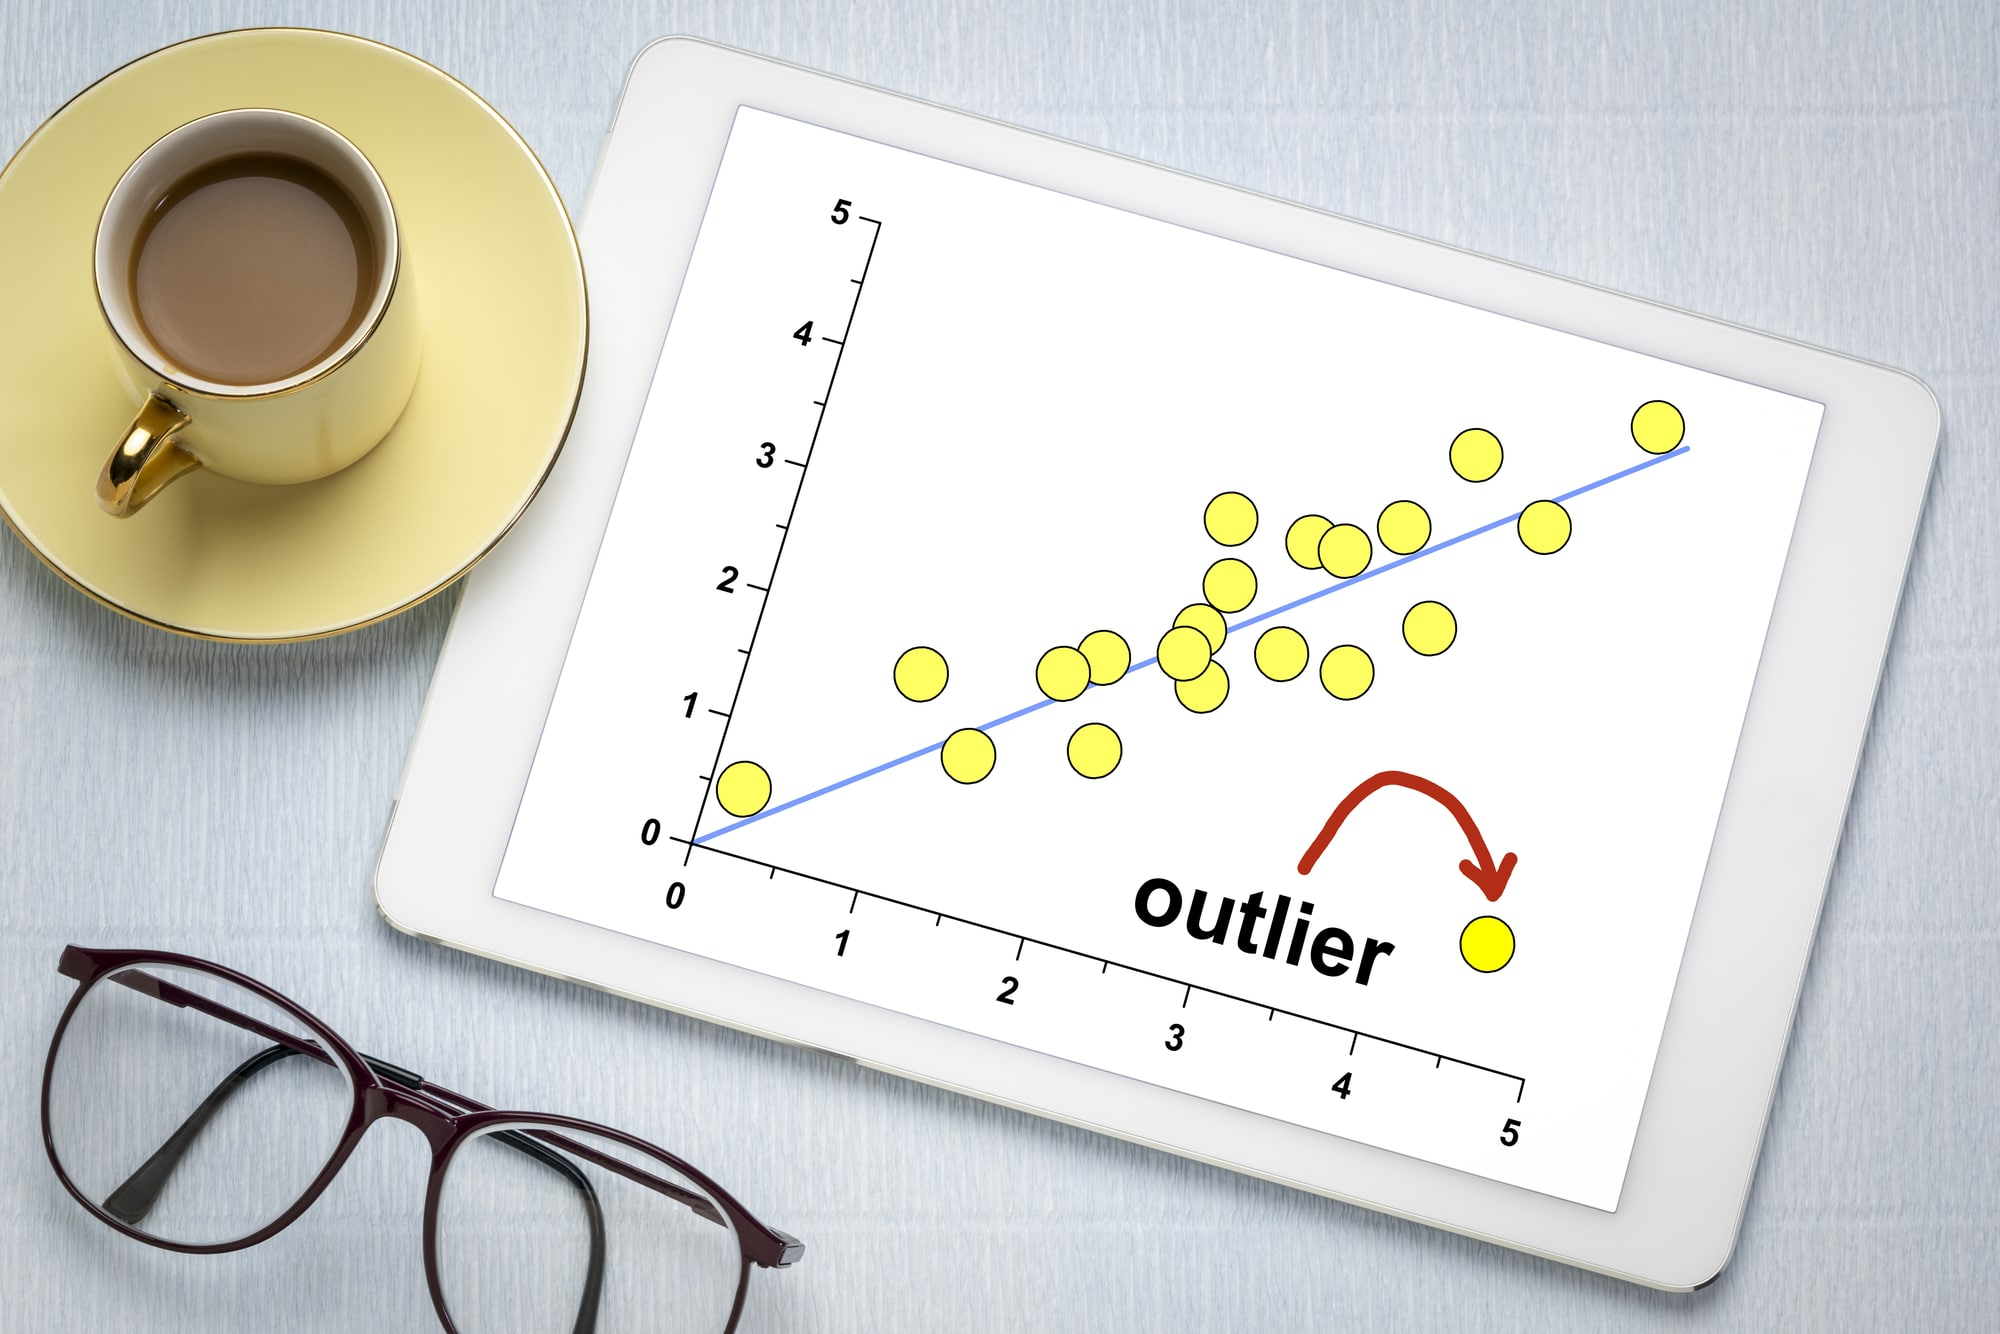

### 2. Oultier Detection Methods

**Vizualization Methods** - Performing visual analysis of the dataset by using Boxplots and Scatter plots to view the data distribution at a glance, then finding the extreme values.


**Statistical Methods** - This is applicable to univaraite data and the methods include;
* **a**. Calculating the ***z-score***, which is a statistical measure that describes a datapoints relationship to its mean. z-score is measured in terms of standard deviations from the mean. A score is 0, it indicates that the data point's score is identical to the mean score. A score of 1.0 would indicate a value that is one standard deviation from the mean. The Empirical Rule in statistics states that 68% of the data falls within 1 standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean. Outliers are then defined as values that fall outside 3 standard deviations from the mean(+/-). 

* **b**. Another statistical method is the ***InterQuartile Range (IQR)*** . IQR is a measure of the dispersion of a dataset. It divides the dataset into quartiles (4 equal parts) then calculates the difference between the upper Quartile (Q3) and lower Quartile (Q1) i.e. Q3 - Q1. The upper quartile (Q3) is the value greater than or equal to 75% of the other values in the dataset, and the lower quartile (Q1) is the value greater than or equal to 25% of the other values. Outliers are then defined as values greater than Q3 + 1.5(IQR) or values less than Q1 - 1.5(IQR)


**Algorithmic Methods** - With larger datasets that have multiple numeric features (multivariate data), it becomes more difficult to detect Outliers using Vizualisation and Statistical methods. This is where the Algorithmic methods come in. 

* **a**. ***DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*** - DBSCAN is a clustering algorithm that groups together points that are close to each other while identifying points that are far away from any cluster as outliers. The algorithm starts by selecting a random point from the dataset then finds all the points that are within a specified radius (epsilon) from this point. If the number of points within this radius is greater than or equal to a specified minimum number of points (min_samples), then a cluster is formed. The algorithm continues to find all the close points of every point in the cluster, forming larger clusters until there are no more points left to add. Points that are not included in any cluster are labelled as noise and considered outliers. A unique use case of this method is identifying fraudulent transactions by credit card companies.

* **b**. ***Isolation Forest*** - This is an unsupervised learning algorithm that falls under the ensemble decision trees family.  This method works differently because it directly isolates outliers instead of profiling and constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that outliers are the minority data points and that they have attribute-values that are very different from those of normal instances. This algorithm works great with very high dimensional datasets.

### 3. Python Code

This section demonstrates the different Outlier detection methods using examples executed with Python code.

#### 3.1 Data Prep

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.ensemble import IsolationForest

#notebook settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
outlier1 = pd.read_csv("C:\\Users\\User\\Documents\\Python\\Outlier Analysis.csv")

print(outlier1.shape)
outlier1.head()

(2452, 8)


,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470


In [3]:
#checking for null values and dtypes
outlier1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 153.4+ KB


In [4]:
#change date column to datetime format
outlier1['Date'] = pd.to_datetime(outlier1['Date'])

In [5]:
#checking descriptive statistis of the numeric columns
outlier1.describe()

,Item_Rating,Selling_Price
count,2452.000000,2452.000000
mean,3.078467,2494.375612
std,1.187137,7115.256516
min,1.000000,33.000000
25%,2.000000,371.000000
50%,3.100000,596.000000
75%,4.100000,1195.250000
max,5.000000,116289.000000


In [6]:
outlier1.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
dtype: int64

In [7]:
#value count of specific columns
print(outlier1['Product_Brand'].value_counts())
print(outlier1['Item_Category'].value_counts())

B-3078    688
B-133      91
B-2679     42
B-2372     40
B-2307     35
         ... 
B-705       1
B-1559      1
B-2657      1
B-2478      1
B-174       1
Name: Product_Brand, Length: 1010, dtype: int64
clothing                                          717
jewellery                                         428
automotive                                        188
footwear                                          161
computers                                         104
                                                 ... 
shopoj white paper sky lantern 80 cm x 34 cm p      1
killys men s solid no show socks                    1
sj barstel 56m 1000m binoculars 30 mm black         1
prime printed 8 seater table cover multicolor       1
v g professional hd 37 hair dryer red               1
Name: Item_Category, Length: 75, dtype: int64


#### 3.2 Vizualisation Methods

Visualizing outliers in the dataset using scatter plot and box plots

In [8]:
#new df with only product brand B-3078
outlier2 = outlier1.query("Product_Brand == 'B-3078'")
print(outlier2.shape)
outlier2.head()

(688, 8)


,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470
6,P-8398,B-3078,footwear,women s footwear,casual shoes,4.1,2017-04-12,1798
19,P-8605,B-3078,kitchen dining,coffee mugs,printland coffee mugs,3.8,2017-01-12,298


##### 3.2.1 Boxplot

<Axes: xlabel='Selling_Price', ylabel='Product_Brand'>

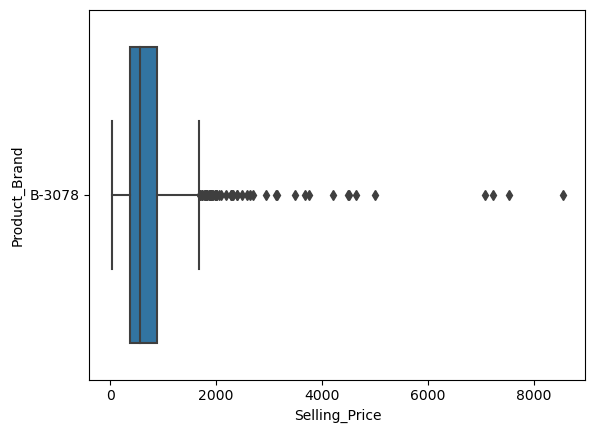

In [9]:
sns.boxplot(x = 'Selling_Price', y = 'Product_Brand', data = outlier2)

In [10]:
# identifying outliers
print(np.where(outlier2['Selling_Price']>2000))

(array([ 57,  71,  82, 106, 119, 152, 154, 167, 176, 195, 199, 231, 275,
       276, 295, 321, 329, 404, 424, 437, 476, 525, 537, 619, 626, 650,
       655, 659], dtype=int64),)


In [11]:
#creating new Outlier column based on cut-off point from visuals
outlier2['Outlier'] = np.where(outlier2['Selling_Price']>2000, 'Yes', 'No')
outlier2.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Outlier
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897,No
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837,No
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470,No
6,P-8398,B-3078,footwear,women s footwear,casual shoes,4.1,2017-04-12,1798,No
19,P-8605,B-3078,kitchen dining,coffee mugs,printland coffee mugs,3.8,2017-01-12,298,No


Understanding the Boxplot.

* Left black vertical line of blue box plot is minimum value

* First black vertical line of rectangle shape of blue box plot is First quartile or 25%

* Second black vertical line of rectangle shape of blue box plot is Second quartile or 50% or median

* Third vertical line of rectangle shape of blue box plot is third quartile or 75%

* Right black vertical line of rectangle shape of blue box plot is maximum value.

* Small diamond shape of blue box plot are the **Outliers**

##### 3.2.2 Scatter Plot

Box plots identify univariate oultiers i.e. for only one feature. However, they fail to identify multivariate outliers i.e when two or more features are involved. That is when scatter plot come in. A scatter plot represents the relationship between two numerical variables.It helps us to visualize if two variables present a linear, polynomial, or another type of relationship, and how strong this relationship is.

<Axes: xlabel='Item_Rating', ylabel='Selling_Price'>

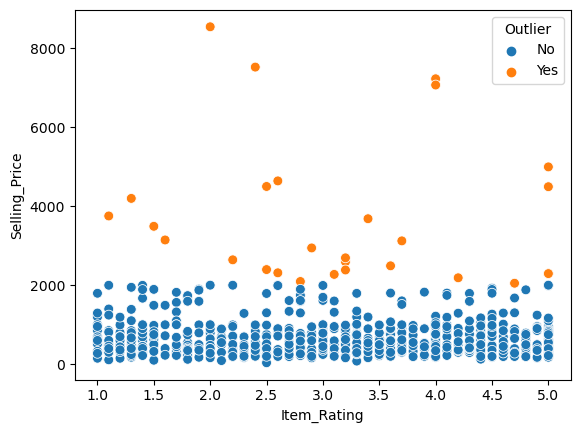

In [12]:
sns.scatterplot(x='Item_Rating', y='Selling_Price', data= outlier2, s=50, hue="Outlier")

#### 3.3 Statistical Methods

Using z-score and Inter Quartile Range (IQR)

##### 3.3.1 z-score

Formula for **z = (x — μ) / σ** where x = Obseration, μ = Mean, and σ = Std Dev 

In [13]:
outlier3 = outlier1[['Selling_Price']]
outlier3. head()

,Selling_Price
0,291
1,897
2,792
3,837
4,470


In [14]:
outlier3['zscore'] = ( outlier3.Selling_Price - outlier3.Selling_Price.mean() ) / outlier3.Selling_Price.std()
outlier3.head()

,Selling_Price,zscore
0,291,-0.309669
1,897,-0.224500
2,792,-0.239257
3,837,-0.232933
4,470,-0.284512


In [15]:
#creating new condition column to determine outliers based on zscores
def conditions(row):
    if row['zscore'] > 3:
        val = 'Yes'
    elif row['zscore'] < -3:
        val = 'Yes'
    else:
        val = 'No'
    return val
    
#Apply the function to each data point in the data frame
outlier3['Outliers']= outlier3.apply(conditions, axis=1)

#viewing columns in new data frame
outlier3.head()

,Selling_Price,zscore,Outliers
0,291,-0.309669,No
1,897,-0.224500,No
2,792,-0.239257,No
3,837,-0.232933,No
4,470,-0.284512,No


In [16]:
#creating a new df for only outliers
outlier_df = outlier3.query("Outliers == 'Yes'")
print(outlier_df.shape)
outlier_df.head()

(100, 3)


,Selling_Price,zscore,Outliers
15,30918,3.994743,Yes
47,28841,3.702835,Yes
48,36339,4.756627,Yes
50,25901,3.289639,Yes
64,33068,4.296911,Yes


##### 3.3.2 Inter Quartile Range (IQR)

IQR Formula  = Q3 - Q1 where Q3 is the upper limit and Q1 is the lower limit

In [17]:
#using df.describe() to get Q3 (75%) and Q1 (25%)
outlier1['Selling_Price'].describe()

count      2452.000000
mean       2494.375612
std        7115.256516
min          33.000000
25%         371.000000
50%         596.000000
75%        1195.250000
max      116289.000000
Name: Selling_Price, dtype: float64

In [18]:
Q1 = outlier1['Selling_Price'].quantile(0.25)
Q3 = outlier1['Selling_Price'].quantile(0.75)

IQR = Q3-Q1
IQR

824.25

In [19]:
outlier_iqr = outlier1[((outlier1['Selling_Price'] < (Q1-1.5*IQR)) | (outlier1['Selling_Price'] > (Q3+1.5*IQR)))]

print(outlier_iqr.shape)
outlier_iqr[['Selling_Price']].head()

(260, 8)


,Selling_Price
8,21770
10,2470
15,30918
45,20961
47,28841


Note that number of outliers in the Selling_Price column using the zscore method is 100 and 260 using IQR method. The IQR method can find more **"Outliers"** than using the zscore method depending on the distribution (shape) of the data. Data that's peaked with long tails will have a comparatively low IQR, so this method will find lots of outliers.

#### 3.4 Algorithmic Methods

A multivariate dataset is going to be used to demonstrate outlier detecton using DBSCAN and Isolation Forest

In [20]:
outlier5 = pd.read_csv('C:\\Users\\User\\Documents\\Python\\Outlier Detection - Multivariate.csv')

print(outlier5.shape)
outlier5.head()

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


##### 3.4.1 DBSCAN

Important DBSCAN hyperparameters are eps (epsilon), min_sample and metric. 

**eps** - maximum distance between two samples for them to be clustered in same group (eps starts at 0.1)

**min_samples** - minimum number of samples in a group for a data point to qualify as a core point

**metric** (default= 'euclidean') - The metric to use when calculating distance between instances in a feature array. 

When usig DBSCAN, it is important to carefully select hyperparameters. Selecting a small eps value means most of the data can be classified as outliers since the neighborhood area is defined as smaller. In contrast, if the eps value is selected too large, then most of the points can be clustered together since they are likely to be located in the same neighborhood

In [21]:
#input data
data = outlier5[["Height", "Weight"]]

# specify & fit model
model = DBSCAN(eps = 1, min_samples = 20, metric= 'euclidean').fit(data)
print(model)

DBSCAN(eps=1, min_samples=20)


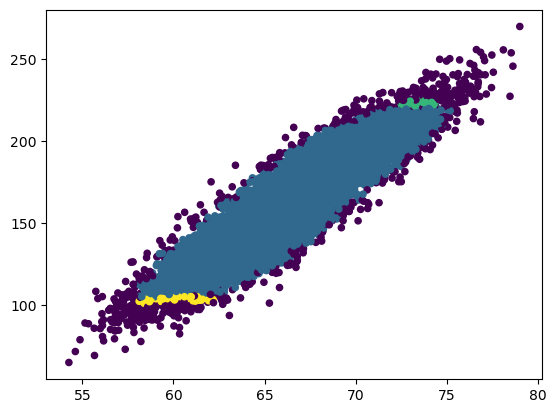

In [22]:
#visualizing outputs
colors = model.labels_
plt.scatter(data["Height"], data["Weight"], c = colors, s =20)

In [23]:
#Counting the number of data pooints in each model label
print (Counter(model.labels_))

Counter({0: 9228, -1: 641, 2: 88, 1: 43})


In [24]:
# creating outliers dataframe - outliers are records with a label value of -1
outliers = data[model.labels_ == -1]
outliers

,Height,Weight
0,73.847017,241.893563
3,71.730978,220.042470
23,75.205974,228.761781
62,73.818535,195.290612
67,72.765370,220.678042
...,...,...
9975,66.251923,124.019917
9978,57.375759,114.192209
9989,60.955084,95.686674
9991,62.636675,102.853563


##### 3.4.2 Isolation Forest

Important Isolation Forest hyperparameters are;

**n_estimators** - The number of base estimators or trees in the ensemble, i.e. the number of trees that will get built in the forest. This is an integer parameter and is optional. The default value is 100.

**max_samples** -  Number of samples to be drawn to train each base estimator.

**max features**: Number of features to draw from the total features to train each base estimator or tree.The default value of max features is one.

**contamination** - The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples.

In [25]:
outlier_input = outlier5[["Height", "Weight"]]

#setting the model
model_IF = IsolationForest(contamination = 0.05, random_state = 42)

#training the model
model_IF.fit(outlier_input)

IsolationForest(contamination=0.05, random_state=42)

In [26]:
outlier_input['outlier_scores'] = model_IF.decision_function(outlier_input)

In [27]:
outlier_input['outlier'] = model_IF.predict(outlier5[["Height", "Weight"]])

In [28]:
outlier_input

,Height,Weight,outlier_scores,outlier
0,73.847017,241.893563,-0.092426,-1
1,68.781904,162.310473,0.104097,1
2,74.110105,212.740856,0.007996,1
3,71.730978,220.042470,0.015033,1
4,69.881796,206.349801,0.094226,1
...,...,...,...,...
9995,66.172652,136.777454,0.085488,1
9996,67.067155,170.867906,0.149051,1
9997,63.867992,128.475319,0.131452,1
9998,69.034243,163.852461,0.099117,1


In [29]:
#seperating outliers into a different dataframe
outlier6 = outlier_input.query("outlier == -1")
print(outlier6.shape)
outlier6.head()

(500, 4)


,Height,Weight,outlier_scores,outlier
0,73.847017,241.893563,-0.092426,-1
23,75.205974,228.761781,-0.083912,-1
82,73.826127,237.916736,-0.078070,-1
115,73.685193,223.270004,-0.004107,-1
190,76.709835,235.035419,-0.128895,-1


### 4. Treating Outliers

As mentioned earlier, outliers may be geniune data points which adds insights or erroneous ones that occured during the data collectio process. Dealing with outliers in a dataset presents a dilemma of removing “good” observations leading to loss of accuracy, or keeping "bad" ones leading to bias of estimates.

The right method needed will depend on domain knowledge and proper understanding of the dataset's distribution.

* Trimming - In some cases, the appropriate thing to do might be simply removing all observations that contain outliers. This can be particularly useful if you have a large number of observations and the outliers are not true representatives of the underlying trend in the dataset.

* Capping - This technique involves setting limits to the value of outliers. A special transformation method that involves capping is called **winsorizing**. This is a method in which you set the maximum values of a feature to a certain value e.g. deciding to set the bottom 2% to the value of the second percentile, and the top 2% to the value of the 98th percentile.

* Imputting - Outliers are treated as missing values, then various imputation techniques as, such as mean, median, mode, nearest neighbor, etc.,are used to replace the values for outliers

* Use of robust statistical measures like median and IQR that are less senstive to outliers during analysis

Lastly, below are a list of Machine Learning (ML) algorithms and their sensitivity to outliers.

Algorithms most affected by outliers are; Linear Regression, Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machines (SVM), K-Means Clustering, Principal Component Analysis (PCA).

Algorithms least affected by outliers are; Decision Trees, Random Forest, XG Boost, Naive Bayes.

### 5. Conclusion

Due to the immense size of data being generated and captured in today's world across multiple industries, it is inevitable for there to be outliers (anomalies). This are usually caused by human error, inconsistencies, manipulation or natural occurences.

Outliers can have hidden patterns and meanings, which, when revealed, can improve the model performance because unnecessary/erroneous data points are removed from the analysis or unearth a pattern that otherwise couldn’t have been revealed. Because each kind of dataset has different kinds of outliers, this project explained how to deal with them and get the best technique applied to improve decision making as a whole.